In [99]:
import numpy as np
import pandas as pd
import pyforest
import pickle

In [44]:
df = pd.read_csv('flightss.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 99999 non-null  int64  
 1   MONTH                99999 non-null  int64  
 2   DAY                  99999 non-null  int64  
 3   DAY_OF_WEEK          99999 non-null  int64  
 4   AIRLINE              99999 non-null  object 
 5   FLIGHT_NUMBER        99999 non-null  int64  
 6   TAIL_NUMBER          99832 non-null  object 
 7   ORIGIN_AIRPORT       99999 non-null  object 
 8   DESTINATION_AIRPORT  99999 non-null  object 
 9   SCHEDULED_DEPARTURE  99999 non-null  int64  
 10  DEPARTURE_TIME       97701 non-null  float64
 11  DEPARTURE_DELAY      97701 non-null  float64
 12  TAXI_OUT             97628 non-null  float64
 13  WHEELS_OFF           97628 non-null  float64
 14  SCHEDULED_TIME       99999 non-null  int64  
 15  ELAPSED_TIME         97386 non-null 

In [46]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,97701.000000,97701.000000,97628.000000,97628.000000,...,99999.000000,97559.000000,97386.000000,99999.000000,99999.000000,34625.000000,34625.000000,34625.000000,34625.000000,34625.000000
mean,2015.0,1.0,3.733887,4.107321,2240.849648,1306.350254,1326.267930,19.938046,17.155908,1348.428514,...,1481.118231,1458.032442,18.342575,0.002240,0.023890,14.026801,0.070787,17.853921,26.014556,2.751971
std,0.0,0.0,1.815522,2.098459,1818.708843,482.327514,503.511173,45.843719,10.738428,504.144849,...,498.918169,538.213952,48.878412,0.047276,0.152708,25.965405,1.692526,43.527539,42.593343,17.265760
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,1.000000,1.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,2.000000,2.000000,759.000000,904.000000,911.000000,-3.000000,11.000000,928.000000,...,1100.000000,1050.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,4.000000,4.000000,1693.000000,1300.000000,1317.000000,3.000000,14.000000,1330.000000,...,1500.000000,1455.000000,4.000000,0.000000,0.000000,4.000000,0.000000,4.000000,10.000000,0.000000
75%,2015.0,1.0,5.000000,6.000000,3394.000000,1720.000000,1739.000000,25.000000,20.000000,1753.000000,...,1908.000000,1911.000000,27.000000,0.000000,0.000000,19.000000,0.000000,19.000000,35.000000,0.000000
max,2015.0,1.0,7.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,2359.000000,2400.000000,1384.000000,1.000000,1.000000,590.000000,107.000000,1380.000000,891.000000,562.000000


In [47]:
df.shape

(99999, 31)

In [48]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              167
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          2298
DEPARTURE_DELAY         2298
TAXI_OUT                2371
WHEELS_OFF              2371
SCHEDULED_TIME             0
ELAPSED_TIME            2613
AIR_TIME                2613
DISTANCE                   0
WHEELS_ON               2440
TAXI_IN                 2440
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2440
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    97610
AIR_SYSTEM_DELAY       65374
SECURITY_DELAY         65374
AIRLINE_DELAY          65374
LATE_AIRCRAFT_DELAY    65374
WEATHER_DELAY          65374
dtype: int64

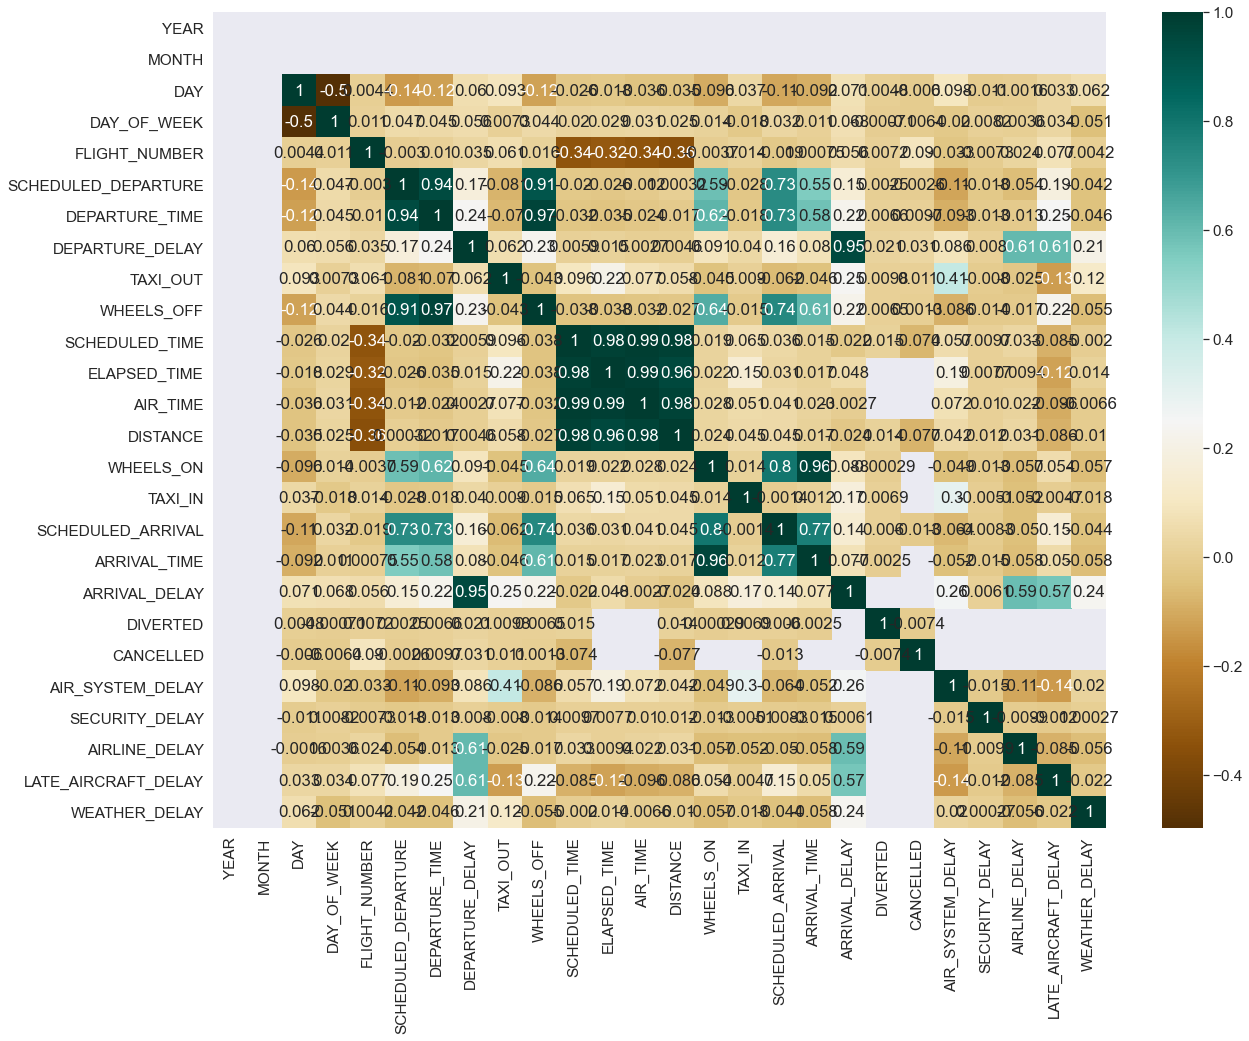

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,15))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

# We observe the correlation coeffients of interdependencies of all the columns here 

In [51]:
# Since not all the columns have much effect, therefore we delete the unnecessary columns
df = df.drop(['YEAR','AIRLINE','FLIGHT_NUMBER','TAIL_NUMBER','SCHEDULED_DEPARTURE','TAXI_OUT','DEPARTURE_TIME','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','SCHEDULED_ARRIVAL','ARRIVAL_TIME','CANCELLATION_REASON'],axis = 1)
df.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,-11.0,1448,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,-8.0,2330,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,-2.0,2296,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,-5.0,2342,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,-1.0,1448,-21.0,0,0,NaN,NaN,NaN,NaN,NaN


In [52]:
df['DEPARTURE_DELAY']=df['DEPARTURE_DELAY'].fillna(df['DEPARTURE_DELAY'].mean())
df['AIR_SYSTEM_DELAY']=df['AIR_SYSTEM_DELAY'].fillna(df['AIR_SYSTEM_DELAY'].mean())
df['SECURITY_DELAY']=df['SECURITY_DELAY'].fillna(df['SECURITY_DELAY'].mean())

In [53]:
df['AIRLINE_DELAY'] = df['AIRLINE_DELAY'].fillna(df['AIRLINE_DELAY'].mean())
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(df['LATE_AIRCRAFT_DELAY'].mean())
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(df['WEATHER_DELAY'].mean())
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].fillna(int(20))  #Initialized a random value of 99 which is greater than 15 minutes

In [54]:
df.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
DISTANCE               0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [55]:
#Converting all values of columns to integers
df['DEPARTURE_DELAY']=df['DEPARTURE_DELAY'].astype(int)
df['AIR_SYSTEM_DELAY']=df['AIR_SYSTEM_DELAY'].astype(int)
df['SECURITY_DELAY']=df['SECURITY_DELAY'].astype(int)
df['AIRLINE_DELAY']=df['AIRLINE_DELAY'].astype(int)
df['LATE_AIRCRAFT_DELAY']=df['LATE_AIRCRAFT_DELAY'].astype(int)
df['WEATHER_DELAY']=df['WEATHER_DELAY'].astype(int)

In [56]:
# We create a new column called route which is a concatenated string of origin and destination airport which can later be label encoded
df['route']= df['ORIGIN_AIRPORT'].astype(str) + df['DESTINATION_AIRPORT'].astype(str)

In [57]:
df['route']

0        ANCSEA
1        LAXPBI
2        SFOCLT
3        LAXMIA
4        SEAANC
          ...  
99994    SLCPSC
99995    ATLBQK
99996    LASPHL
99997    SFOBFL
99998    ORDMCO
Name: route, Length: 99999, dtype: object

In [58]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
df['route']= lab.fit_transform(df['route'])
df['route'].unique()

array([  77, 2198, 3667, ..., 1773, 1520, 1271])

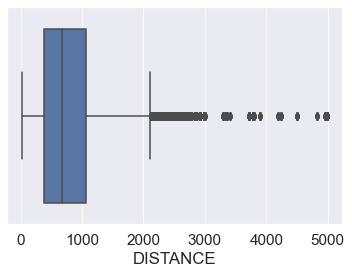

In [59]:
sns.boxplot(x=df['DISTANCE'])

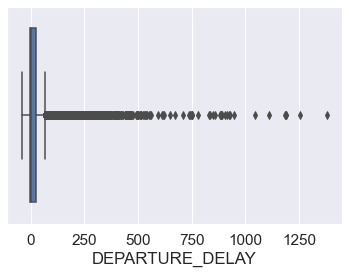

In [60]:
sns.boxplot(x=df['DEPARTURE_DELAY'])

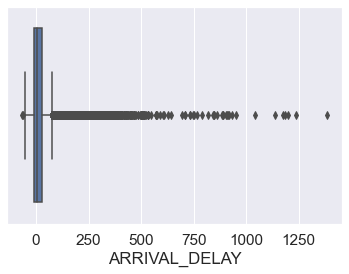

In [61]:
sns.boxplot(x=df['ARRIVAL_DELAY'])

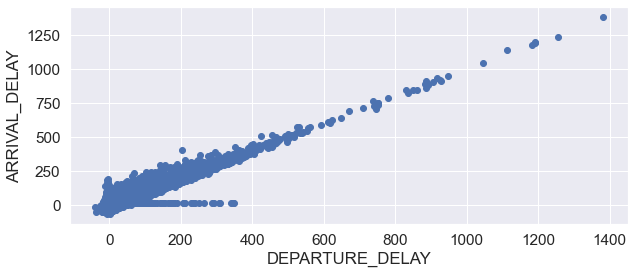

In [62]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df['DEPARTURE_DELAY'] , df['ARRIVAL_DELAY'])
ax.set_xlabel('DEPARTURE_DELAY')
ax.set_ylabel('ARRIVAL_DELAY')
plt.show()

# Departure Delay directly affects the arrival delay 

In [63]:
#Created a final result column where 1 represents that the flight is late and 0 represents that it is on time
res=[]
for i in range (len(df['ARRIVAL_DELAY'])):
    if (df['ARRIVAL_DELAY'][i]>15):  #If a flight is late for more than 15 mins then it is put under the late arrived category
        res.append(1)
    else:
        res.append(0)
df['res']=res

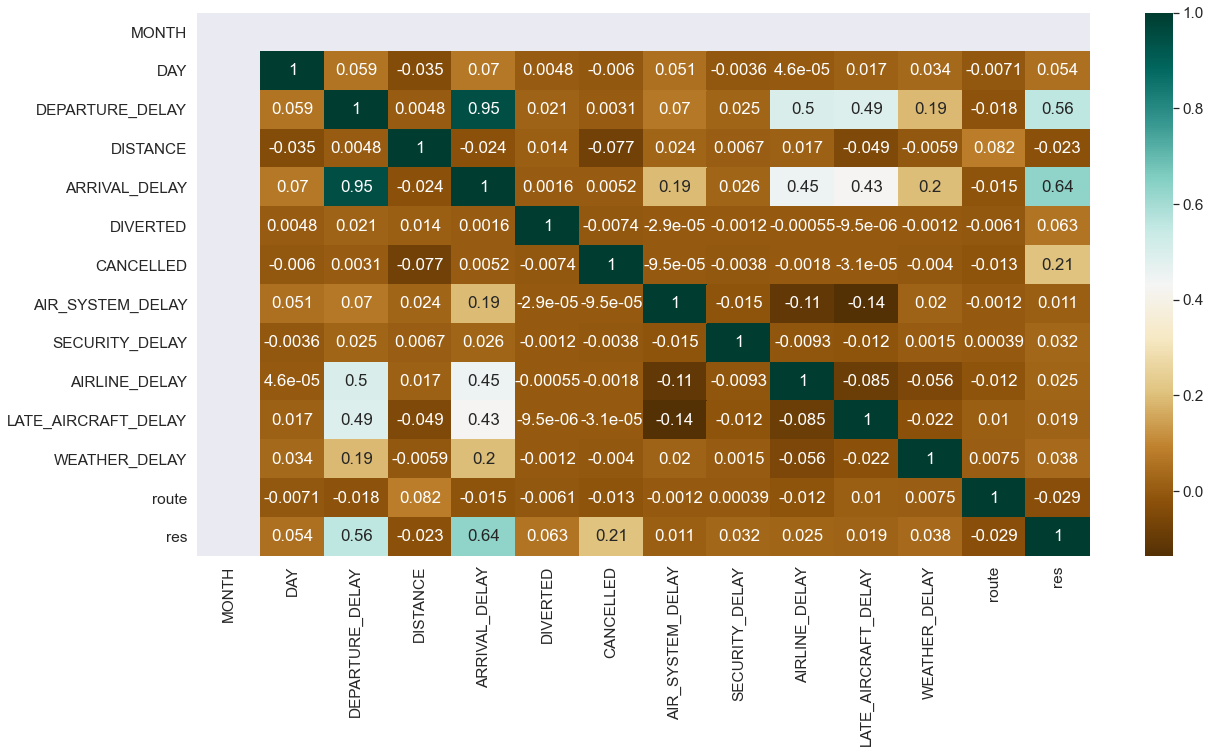

In [64]:
# We check the inter-dependencies of columns
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

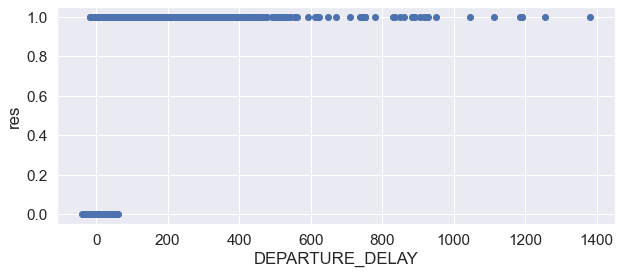

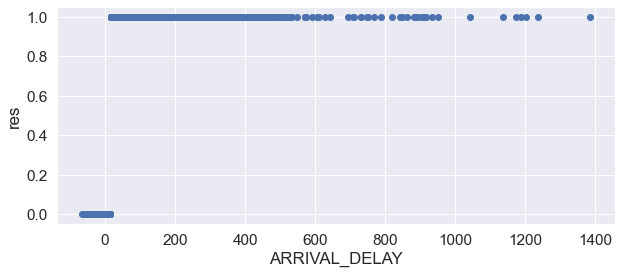

In [65]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df['DEPARTURE_DELAY'] , df['res'])
ax.set_xlabel('DEPARTURE_DELAY')
ax.set_ylabel('res')
plt.show()

fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df['ARRIVAL_DELAY'] , df['res'])
ax.set_xlabel('ARRIVAL_DELAY')
ax.set_ylabel('res')
plt.show()

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

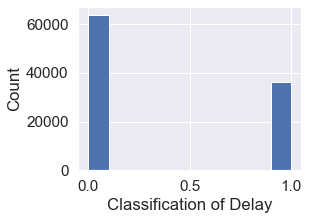

In [66]:
plt.figure(figsize=(4,3))
plt.hist(df.res)
plt.xlabel('Classification of Delay')
plt.ylabel('Count')
plt.tight_layout

# Here 1 represents delay while 0 represents being on time

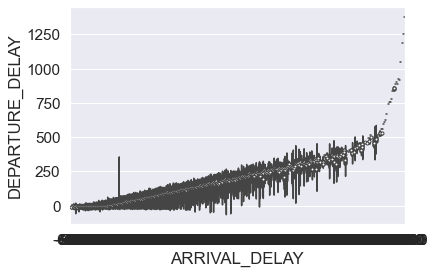

In [67]:
sns.violinplot(x='ARRIVAL_DELAY',y='DEPARTURE_DELAY',data=df,size=6)

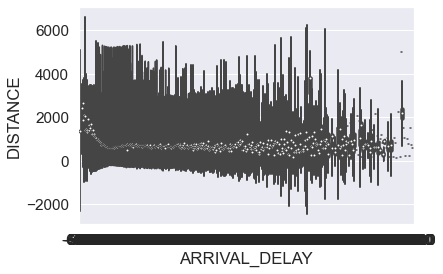

In [68]:
sns.violinplot(x='ARRIVAL_DELAY',y='DISTANCE',data=df,size=6)

In [69]:
df.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,route,res
0,1,1,ANC,SEA,-11,1448,-22.0,0,0,14,0,17,26,2,77,0
1,1,1,LAX,PBI,-8,2330,-9.0,0,0,14,0,17,26,2,2198,0
2,1,1,SFO,CLT,-2,2296,5.0,0,0,14,0,17,26,2,3667,0
3,1,1,LAX,MIA,-5,2342,-9.0,0,0,14,0,17,26,2,2188,0
4,1,1,SEA,ANC,-1,1448,-21.0,0,0,14,0,17,26,2,3593,0


In [70]:
x = df.iloc[:,[0,1,4,5,7,8,9,10,11,12,13,14]].values
y = df.iloc[:,15].values

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [73]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [74]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,'%')

Accuracy: 99.78333333333333 %


[[19017    26]
 [   39 10918]]


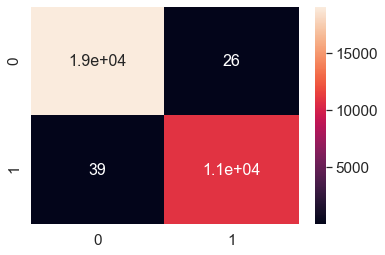

In [75]:
from sklearn import metrics
cnf=metrics.confusion_matrix(y_test,y_pred)
print(cnf)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cnf, annot=True, annot_kws={"size": 16}) # font size

plt.show()

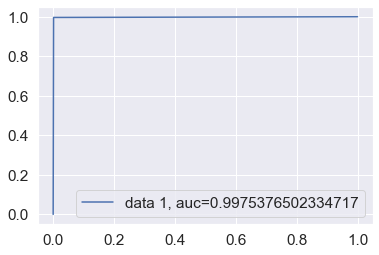

In [76]:
from sklearn import metrics 
import matplotlib.pyplot as plt
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [81]:
x.shape

(99999, 12)

In [83]:
x[1]

array([   1,    1,   -8, 2330,    0,    0,   14,    0,   17,   26,    2,
       2198], dtype=int64)

In [98]:
df.columns[[0,1,4,5,7,8,9,10,11,12,13,14]]

Index(['MONTH', 'DAY', 'DEPARTURE_DELAY', 'DISTANCE', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'route'],
      dtype='object')

In [107]:
pred = clf.predict([[   11,    1,   -250, 23000,    0,    0,   14.009280092800928,    0.024510245102451023,   26.005040050400503,   2.2603726037260374,    17.295672956729568,  2180000]])
pred

array([0], dtype=int64)

In [100]:
pickle.dump(clf,open('res.pkl','wb'))

In [101]:
df.AIR_SYSTEM_DELAY.mean()

14.009280092800928

In [102]:
df.SECURITY_DELAY.mean()

0.024510245102451023

In [104]:
df.LATE_AIRCRAFT_DELAY.mean()

26.005040050400503

In [105]:
df.WEATHER_DELAY.mean()

2.2603726037260374

In [106]:
df.AIRLINE_DELAY.mean()

17.295672956729568